# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,744,96,46,88,174,68,10,155,43,19,148,173,354,182,69,14,15,194,202
1,611,90,49,85,141,57,11,159,43,20,167,173,365,186,75,1,11,182,192
2,384,88,44,71,145,56,8,142,48,19,143,159,296,174,68,7,18,188,197
3,790,85,43,66,120,54,5,148,46,19,145,168,320,174,87,8,2,179,181
4,561,88,39,88,194,69,8,168,40,20,133,199,416,151,74,3,22,186,192
5,199,82,44,72,136,61,7,147,46,19,143,173,317,183,81,6,17,181,185
6,298,91,40,98,192,64,9,177,38,21,135,194,465,165,66,9,35,195,205
7,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
8,131,86,36,77,165,60,7,150,45,19,128,174,331,131,66,0,32,196,203
9,417,96,36,74,183,70,6,149,43,19,127,178,341,127,69,0,17,201,205


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.677596,93.743169,44.985428,82.384335,169.357013,61.517304,8.604736,169.435337,40.734062,20.622951,148.311475,189.191257,442.468124,175.367942,72.413479,6.382514,12.816029,189.014572,195.732240
std,243.562451,8.132882,6.109685,15.783197,33.535362,7.334934,4.513408,32.692411,7.662256,2.559850,14.306839,30.322744,174.258998,32.227173,7.190213,4.879510,8.820847,6.298807,7.571513
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,223.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,432.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,180.000000,366.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,634.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,216.000000,586.000000,199.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,110.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,262.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [5]:
y_train_pd = pd.DataFrame(data=y_train)

y_train_pd.head()

,0
0,van
1,van
2,opel
3,bus
4,opel


In [6]:
y_train_pd.describe()

,0
count,549
unique,4
top,bus
freq,146


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
from matplotlib import pyplot as plt

### Пропусков и null-значений нет

In [8]:
print(f"Есть NaN - {X_train_pd.isna().values.any()}")
print(f"Есть null - {X_train_pd.isnull().values.any()}")

print(f"Есть NaN - {y_train_pd.isna().values.any()}")
print(f"Есть null - {y_train_pd.isnull().values.any()}")

Есть NaN - False
Есть null - False
Есть NaN - False
Есть null - False


### Преобразование нечисловых признаков в target

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
le.fit(np.unique(y_train))

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)

In [11]:
y_train_pd.head()

,0
0,3
1,3
2,1
3,0
4,1


### Масштабирование с использованием или MinMaxScaler


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [13]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from scikitplot.metrics import plot_roc

### F1-score

In [16]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500))
])

parameters = {
    "clf__C": np.logspace(-10, 5, 85)
}

clf = GridSearchCV(pipe, parameters, scoring="f1_macro", verbose=3)

# Training

clf.fit(X_train, y_train)

Fitting 5 folds for each of 85 candidates, totalling 425 fits
[CV 1/5] END ......................clf__C=1e-10;, score=0.101 total time=   0.0s
[CV 2/5] END ......................clf__C=1e-10;, score=0.099 total time=   0.0s
[CV 3/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 4/5] END ......................clf__C=1e-10;, score=0.101 total time=   0.0s
[CV 5/5] END ......................clf__C=1e-10;, score=0.102 total time=   0.0s
[CV 1/5] END .....clf__C=1.5085907086001793e-10;, score=0.101 total time=   0.0s
[CV 2/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 3/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 4/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 5/5] END .....clf__C=1.5085907086001793e-10;, score=0.102 total time=   0.0s
[CV 1/5] END ......clf__C=2.275845926074791e-10;, score=0.101 total time=   0.0s
[CV 2/5] END ......clf__C=2.275845926074791e-10

/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..........clf__C=719.6856730011528;, score=0.728 total time=   0.1s
[CV 4/5] END ..........clf__C=719.6856730011528;, score=0.795 total time=   0.1s
[CV 5/5] END ..........clf__C=719.6856730011528;, score=0.761 total time=   0.1s
[CV 1/5] END .........clf__C=1085.7111194022061;, score=0.793 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .........clf__C=1085.7111194022061;, score=0.866 total time=   0.1s
[CV 3/5] END .........clf__C=1085.7111194022061;, score=0.728 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .........clf__C=1085.7111194022061;, score=0.795 total time=   0.1s
[CV 5/5] END .........clf__C=1085.7111194022061;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..........clf__C=1637.893706954068;, score=0.784 total time=   0.1s
[CV 2/5] END ..........clf__C=1637.893706954068;, score=0.866 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..........clf__C=1637.893706954068;, score=0.728 total time=   0.1s
[CV 4/5] END ..........clf__C=1637.893706954068;, score=0.795 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..........clf__C=1637.893706954068;, score=0.761 total time=   0.1s
[CV 1/5] END .........clf__C=2470.9112279856017;, score=0.784 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .........clf__C=2470.9112279856017;, score=0.866 total time=   0.1s
[CV 3/5] END .........clf__C=2470.9112279856017;, score=0.728 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .........clf__C=2470.9112279856017;, score=0.795 total time=   0.1s
[CV 5/5] END .........clf__C=2470.9112279856017;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..........clf__C=3727.593720314938;, score=0.784 total time=   0.1s
[CV 2/5] END ..........clf__C=3727.593720314938;, score=0.866 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..........clf__C=3727.593720314938;, score=0.728 total time=   0.1s
[CV 4/5] END ..........clf__C=3727.593720314938;, score=0.795 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..........clf__C=3727.593720314938;, score=0.761 total time=   0.1s
[CV 1/5] END ..........clf__C=5623.413251903491;, score=0.784 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..........clf__C=5623.413251903491;, score=0.866 total time=   0.1s
[CV 3/5] END ..........clf__C=5623.413251903491;, score=0.728 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..........clf__C=5623.413251903491;, score=0.795 total time=   0.1s
[CV 5/5] END ..........clf__C=5623.413251903491;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..........clf__C=8483.428982440726;, score=0.784 total time=   0.1s
[CV 2/5] END ..........clf__C=8483.428982440726;, score=0.866 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..........clf__C=8483.428982440726;, score=0.728 total time=   0.1s
[CV 4/5] END ..........clf__C=8483.428982440726;, score=0.795 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..........clf__C=8483.428982440726;, score=0.761 total time=   0.1s
[CV 1/5] END .........clf__C=12798.022139979552;, score=0.784 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .........clf__C=12798.022139979552;, score=0.866 total time=   0.1s
[CV 3/5] END .........clf__C=12798.022139979552;, score=0.728 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .........clf__C=12798.022139979552;, score=0.795 total time=   0.1s
[CV 5/5] END .........clf__C=12798.022139979552;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .........clf__C=19306.977288832535;, score=0.784 total time=   0.1s
[CV 2/5] END .........clf__C=19306.977288832535;, score=0.866 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .........clf__C=19306.977288832535;, score=0.728 total time=   0.1s
[CV 4/5] END .........clf__C=19306.977288832535;, score=0.795 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .........clf__C=19306.977288832535;, score=0.761 total time=   0.1s
[CV 1/5] END .........clf__C=29126.326549087444;, score=0.784 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .........clf__C=29126.326549087444;, score=0.866 total time=   0.1s
[CV 3/5] END .........clf__C=29126.326549087444;, score=0.728 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .........clf__C=29126.326549087444;, score=0.795 total time=   0.1s
[CV 5/5] END .........clf__C=29126.326549087444;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..........clf__C=43939.70560760786;, score=0.784 total time=   0.1s
[CV 2/5] END ..........clf__C=43939.70560760786;, score=0.866 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..........clf__C=43939.70560760786;, score=0.728 total time=   0.1s
[CV 4/5] END ..........clf__C=43939.70560760786;, score=0.795 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..........clf__C=43939.70560760786;, score=0.761 total time=   0.1s
[CV 1/5] END ..........clf__C=66287.03161826442;, score=0.784 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..........clf__C=66287.03161826442;, score=0.866 total time=   0.1s
[CV 3/5] END ..........clf__C=66287.03161826442;, score=0.728 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..........clf__C=66287.03161826442;, score=0.795 total time=   0.1s
[CV 5/5] END ..........clf__C=66287.03161826442;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...................clf__C=100000.0;, score=0.784 total time=   0.1s
[CV 2/5] END ...................clf__C=100000.0;, score=0.866 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...................clf__C=100000.0;, score=0.728 total time=   0.1s
[CV 4/5] END ...................clf__C=100000.0;, score=0.795 total time=   0.1s
[CV 5/5] END ...................clf__C=100000.0;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'clf__C': array([1.00000000e-10, 1.50859071e-10, 2.27584593e-10, 3.43332002e-10,
       5.17947468e-10, 7.81370738e-10, 1.17876863e-09, 1.77827941e-09,
       2.68269580e-09, 4.04708995e-09, 6.10540230e-09...
       5.17947468e+00, 7.81370738e+00, 1.17876863e+01, 1.77827941e+01,
       2.68269580e+01, 4.04708995e+01, 6.10540230e+01, 9.21055318e+01,
       1.38949549e+02, 2.09617999e+02, 3.16227766e+02, 4.77058270e+02,
       7.19685673e+02, 1.08571112e+03, 1.63789371e+03, 2.47091123e+03,
       3.72759372e+03, 5.62341325e+03, 8.48342898e+03, 1.2798

In [17]:
print(f"F1-Score = {clf.score(X_test, y_test):.6f}")

F1-Score = 0.752947


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

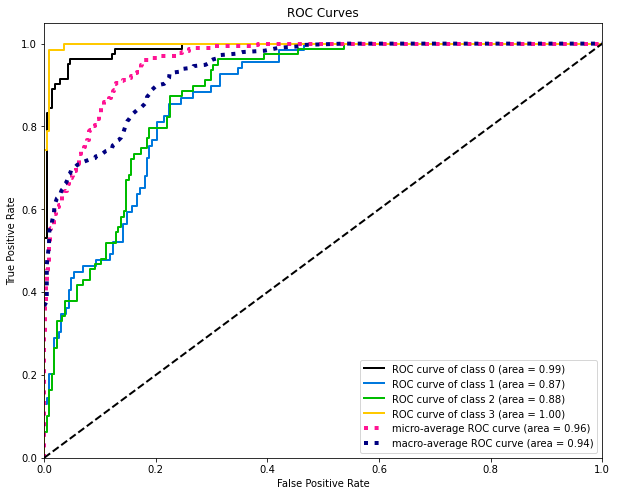

In [18]:
plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 8))

### Accuracy score

In [19]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500))
])

parameters = {
    "clf__C": np.logspace(-10, 4, 50)
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", verbose=3)

# Training

clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ......................clf__C=1e-10;, score=0.255 total time=   0.0s
[CV 2/5] END ......................clf__C=1e-10;, score=0.264 total time=   0.0s
[CV 3/5] END ......................clf__C=1e-10;, score=0.264 total time=   0.0s
[CV 4/5] END ......................clf__C=1e-10;, score=0.264 total time=   0.0s
[CV 5/5] END ......................clf__C=1e-10;, score=0.257 total time=   0.0s
[CV 1/5] END .....clf__C=1.9306977288832535e-10;, score=0.255 total time=   0.0s
[CV 2/5] END .....clf__C=1.9306977288832535e-10;, score=0.245 total time=   0.0s
[CV 3/5] END .....clf__C=1.9306977288832535e-10;, score=0.245 total time=   0.0s
[CV 4/5] END .....clf__C=1.9306977288832535e-10;, score=0.264 total time=   0.0s
[CV 5/5] END .....clf__C=1.9306977288832535e-10;, score=0.257 total time=   0.0s
[CV 1/5] END ......clf__C=3.727593720314938e-10;, score=0.255 total time=   0.0s
[CV 2/5] END ......clf__C=3.727593720314938e-10

/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..........clf__C=719.6856730011499;, score=0.761 total time=   0.1s
[CV 1/5] END .........clf__C=1389.4954943731361;, score=0.782 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .........clf__C=1389.4954943731361;, score=0.864 total time=   0.1s
[CV 3/5] END .........clf__C=1389.4954943731361;, score=0.727 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .........clf__C=1389.4954943731361;, score=0.791 total time=   0.1s
[CV 5/5] END .........clf__C=1389.4954943731361;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .........clf__C=2682.6957952797165;, score=0.782 total time=   0.1s
[CV 2/5] END .........clf__C=2682.6957952797165;, score=0.864 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .........clf__C=2682.6957952797165;, score=0.727 total time=   0.1s
[CV 4/5] END .........clf__C=2682.6957952797165;, score=0.791 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .........clf__C=2682.6957952797165;, score=0.761 total time=   0.1s
[CV 1/5] END ..........clf__C=5179.474679231202;, score=0.782 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..........clf__C=5179.474679231202;, score=0.864 total time=   0.1s
[CV 3/5] END ..........clf__C=5179.474679231202;, score=0.727 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..........clf__C=5179.474679231202;, score=0.791 total time=   0.1s
[CV 5/5] END ..........clf__C=5179.474679231202;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....................clf__C=10000.0;, score=0.782 total time=   0.1s
[CV 2/5] END ....................clf__C=10000.0;, score=0.864 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....................clf__C=10000.0;, score=0.727 total time=   0.1s
[CV 4/5] END ....................clf__C=10000.0;, score=0.791 total time=   0.1s
[CV 5/5] END ....................clf__C=10000.0;, score=0.761 total time=   0.1s


/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'clf__C': array([1.00000000e-10, 1.93069773e-10, 3.72759372e-10, 7.19685673e-10,
       1.38949549e-09, 2.68269580e-09, 5.17947468e-09, 1.00000000e-08,
       1.93069773e-08, 3.72759372e-08, 7.19685673e-08...
       1.00000000e-02, 1.93069773e-02, 3.72759372e-02, 7.19685673e-02,
       1.38949549e-01, 2.68269580e-01, 5.17947468e-01, 1.00000000e+00,
       1.93069773e+00, 3.72759372e+00, 7.19685673e+00, 1.38949549e+01,
       2.68269580e+01, 5.17947468e+01, 1.00000000e+02, 1.93069773e+02,
       3.72759372e+02, 7.19685673e+02, 1.38949549e+03, 2.6826

In [20]:
print(f"Accuracy score = {clf.score(X_test, y_test):.6f}")

Accuracy score = 0.757576


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

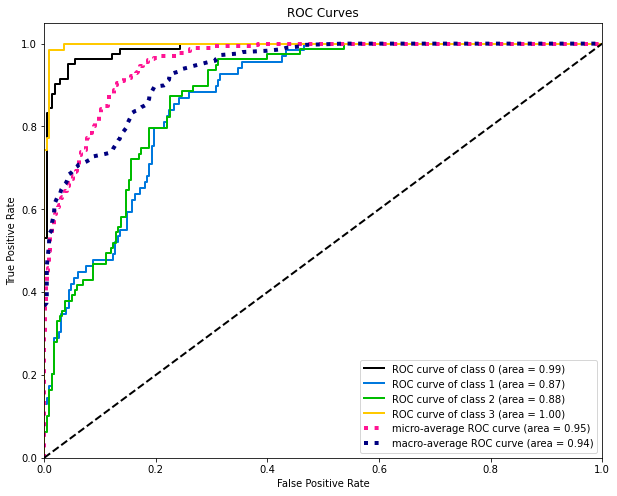

In [21]:
plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 8))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

1 - 0.6389123649187775
2 - 0.9838105724467299
3 - 0.9911042252870206
4 - 0.9956744882113807
5 - 0.9973300365035759
6 - 0.9980769648275498
7 - 0.9986194151736134
8 - 0.9990613268496532
9 - 0.9993556046207319
10 - 0.9995986585274347
11 - 0.9997303610162944
12 - 0.9998333419552015
13 - 0.9998918319637579
14 - 0.9999440468335903
15 - 0.9999704656170312
16 - 0.9999892030938958
17 - 0.999996638351069
18 - 0.9999992677808365
19 - 1.0


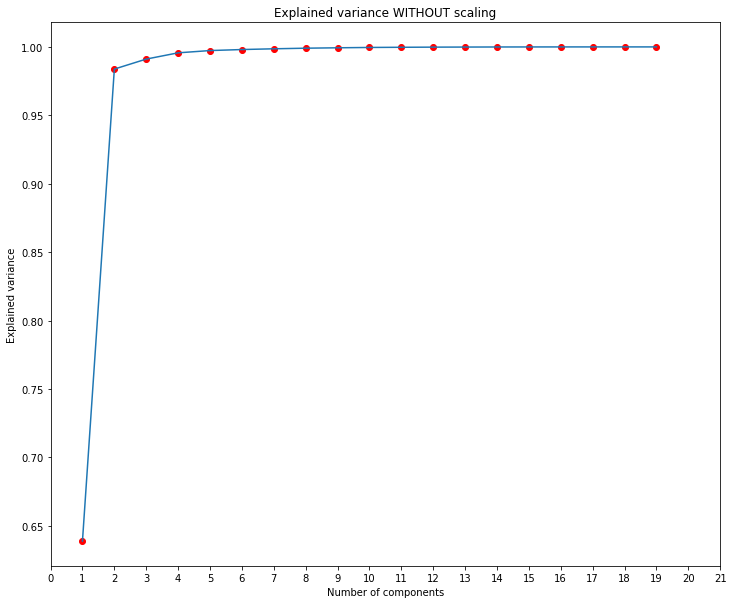

In [23]:
variances = []
# X_train_normalized = StandardScaler().fit_transform(X_train)

for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components)
    pca.fit(X_train)

    variances.append(pca.explained_variance_ratio_.sum())
    print(f"{n_components} - {pca.explained_variance_ratio_.sum()}")

plt.figure(figsize=(12, 10))

plt.plot(np.arange(1, X_train.shape[1] + 1), variances)
plt.scatter(np.arange(1, X_train.shape[1] + 1), variances, color='red')

plt.title("Explained variance WITHOUT scaling")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.xticks(np.arange(0, X_train.shape[1] + 3))

plt.show()

1 - 0.49496951901697467
2 - 0.6466977329370984
3 - 0.7570857218804471
4 - 0.8177748206761579
5 - 0.8693414052800569
6 - 0.91920178433683
7 - 0.9460659583801424
8 - 0.9636707409319621
9 - 0.9759399711619883
10 - 0.9842859094555666
11 - 0.9893046271408419
12 - 0.9927865476784625
13 - 0.9951618581063478
14 - 0.996972828799709
15 - 0.9981949606702188
16 - 0.9989818070302603
17 - 0.9996513777333617
18 - 0.9999798470925065
19 - 0.9999999999999996


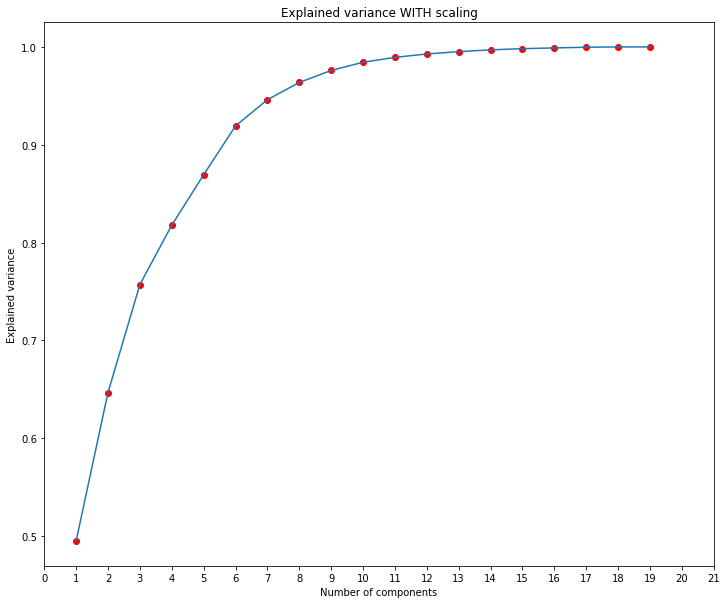

In [24]:
variances = []
X_train_normalized = StandardScaler().fit_transform(X_train)

for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components)
    pca.fit(X_train_normalized)

    variances.append(pca.explained_variance_ratio_.sum())
    print(f"{n_components} - {pca.explained_variance_ratio_.sum()}")

plt.figure(figsize=(12, 10))

plt.plot(np.arange(1, X_train.shape[1] + 1), variances)
plt.scatter(np.arange(1, X_train.shape[1] + 1), variances, color='red')

plt.title("Explained variance WITH scaling")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.xticks(np.arange(0, X_train.shape[1] + 3))

plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Необходимо нормализовывать данные перед применением PCA, так как этот метод отображает наши исходные данные на те направления, где достигается наибольшая дисперсия. Если не нормализовывать данные, то признаки с большим разбросом PCA будет учитывать сильнее, чем остальные признаки, и их вклад будет сильнее.

При числе компонент 12 доля объясненной дисперсии > 0.99, такого количества достаточно.

In [16]:
n_components = 12

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

### F1-score

In [26]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
    ('clf', LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500))
])

parameters = {
    "clf__C": np.logspace(-10, 5, 85)
}

clf = GridSearchCV(pipe, parameters, scoring="f1_macro", verbose=3)

# Training

clf.fit(X_train, y_train)

Fitting 5 folds for each of 85 candidates, totalling 425 fits
[CV 1/5] END ......................clf__C=1e-10;, score=0.101 total time=   0.0s
[CV 2/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 3/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 4/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 5/5] END ......................clf__C=1e-10;, score=0.102 total time=   0.0s
[CV 1/5] END .....clf__C=1.5085907086001793e-10;, score=0.101 total time=   0.0s
[CV 2/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 3/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 4/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 5/5] END .....clf__C=1.5085907086001793e-10;, score=0.102 total time=   0.0s
[CV 1/5] END ......clf__C=2.275845926074791e-10;, score=0.101 total time=   0.0s
[CV 2/5] END ......clf__C=2.275845926074791e-10

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=12)),
                                       ('scaler2', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'clf__C': array([1.00000000e-10, 1.50859071e-10, 2.27584593e-10, 3.43332002e-10,
       5.17947468e-10, 7.81370738e-10, 1.17876863e-09, 1...
       5.17947468e+00, 7.81370738e+00, 1.17876863e+01, 1.77827941e+01,
       2.68269580e+01, 4.04708995e+01, 6.10540230e+01, 9.21055318e+01,
       1.38949549e+02, 2.09617999e+02, 3.16227766e+02, 4.77058270e+02,
       7.19685673e+02, 1.08571112e+03, 1.63789371e+03, 2.470

In [27]:
print(f"F1-score = {clf.score(X_test, y_test):.6f}")

F1-score = 0.726804


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

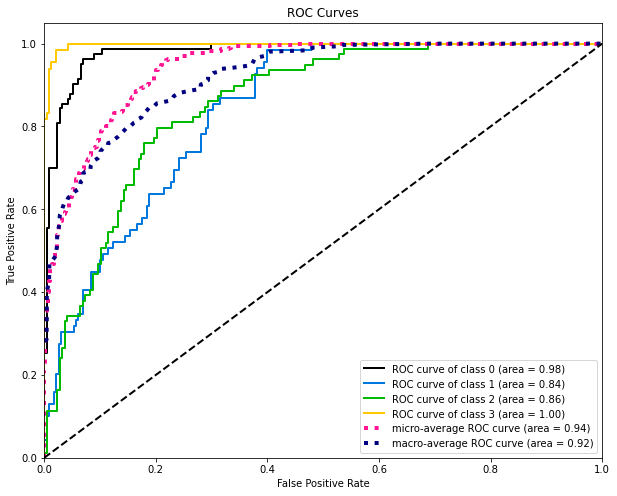

In [28]:
plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 8))

### Accuracy score

In [29]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
    ('clf', LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500))
])

parameters = {
    "clf__C": np.logspace(-20, 5, 100)
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", verbose=3)

# Training

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ......................clf__C=1e-20;, score=0.255 total time=   0.0s
[CV 2/5] END ......................clf__C=1e-20;, score=0.245 total time=   0.0s
[CV 3/5] END ......................clf__C=1e-20;, score=0.264 total time=   0.0s
[CV 4/5] END ......................clf__C=1e-20;, score=0.264 total time=   0.0s
[CV 5/5] END ......................clf__C=1e-20;, score=0.257 total time=   0.0s
[CV 1/5] END ......clf__C=1.788649529057435e-20;, score=0.255 total time=   0.0s
[CV 2/5] END ......clf__C=1.788649529057435e-20;, score=0.264 total time=   0.0s
[CV 3/5] END ......clf__C=1.788649529057435e-20;, score=0.264 total time=   0.0s
[CV 4/5] END ......clf__C=1.788649529057435e-20;, score=0.264 total time=   0.0s
[CV 5/5] END ......clf__C=1.788649529057435e-20;, score=0.257 total time=   0.0s
[CV 1/5] END .....clf__C=3.1992671377973844e-20;, score=0.255 total time=   0.0s
[CV 2/5] END .....clf__C=3.1992671377973844e-2

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=12)),
                                       ('scaler2', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'clf__C': array([1.00000000e-20, 1.78864953e-20, 3.19926714e-20, 5.72236766e-20,
       1.02353102e-19, 1.83073828e-19, 3.27454916e-19, 5...
       1.55567614e-01, 2.78255940e-01, 4.97702356e-01, 8.90215085e-01,
       1.59228279e+00, 2.84803587e+00, 5.09413801e+00, 9.11162756e+00,
       1.62975083e+01, 2.91505306e+01, 5.21400829e+01, 9.32603347e+01,
       1.66810054e+02, 2.98364724e+02, 5.33669923e+02, 9.545

In [30]:
print(f"Accuracy score = {clf.score(X_test, y_test):.6f}")

Accuracy score = 0.723906


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

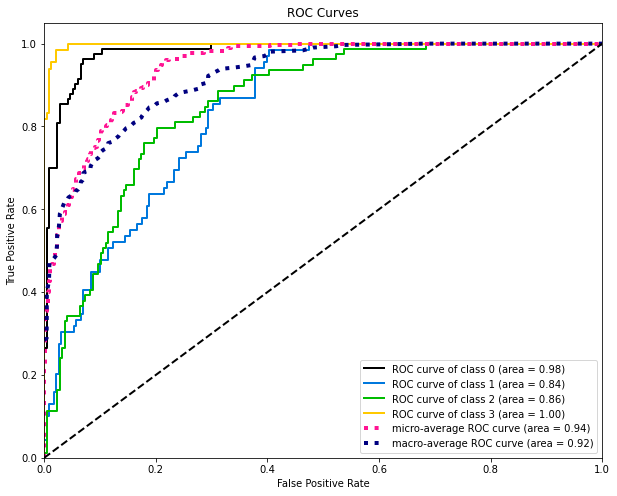

In [31]:
plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 8))

Скоры модели почти не изменились, но благодаря PCA уменьшили размер данных.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

### F1-score

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV 1/5] END ..................clf__max_depth=1;, score=0.290 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=1;, score=0.313 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=1;, score=0.288 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=1;, score=0.281 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=1;, score=0.247 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=2;, score=0.520 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=2;, score=0.480 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=2;, score=0.469 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=2;, score=0.467 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=2;, score=0.458 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=3;, score=0.514 total time=   0.0s
[CV 2/5] END ..................clf__max_depth

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

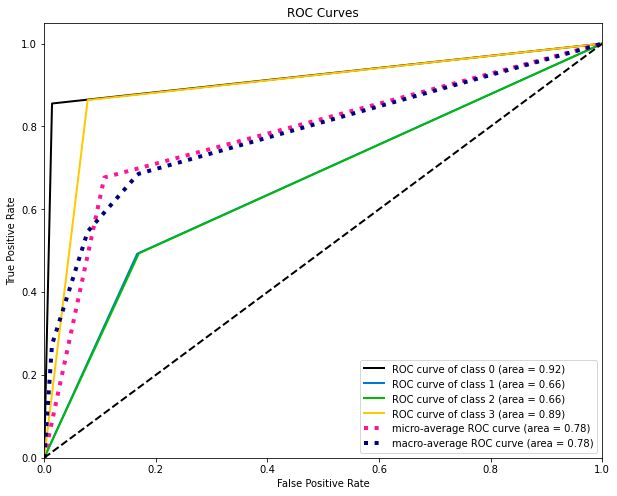

In [33]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

parameters = {
    "clf__max_depth": np.arange(1, 1000)
}

clf = GridSearchCV(pipe, parameters, scoring="f1_macro", verbose=3)

# Training

clf.fit(X_train, y_train)
print(f"F1-score: {clf.score(X_test, y_test):.6f}")

# ROC
plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 8))

### Accuracy score

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV 1/5] END ..................clf__max_depth=1;, score=0.436 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=1;, score=0.473 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=1;, score=0.436 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=1;, score=0.418 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=1;, score=0.376 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=2;, score=0.600 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=2;, score=0.564 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=2;, score=0.545 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=2;, score=0.536 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=2;, score=0.532 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=3;, score=0.591 total time=   0.0s
[CV 2/5] END ..................clf__max_depth

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

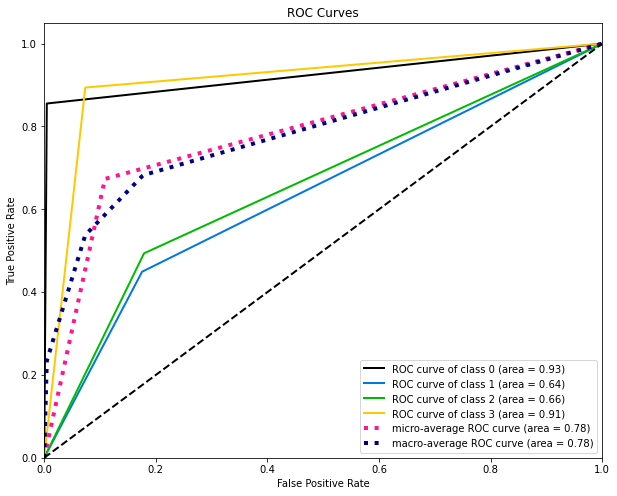

In [34]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', StandardScaler()),    
    ('clf', DecisionTreeClassifier())
])

parameters = {
    "clf__max_depth": np.arange(1, 1000)
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", verbose=3)

# Training

clf.fit(X_train, y_train)
print(f"Accuracy score: {clf.score(X_test, y_test)}")

# ROC
plot_roc(y_test, clf.predict_proba(X_test), figsize=(10, 8))

Одно дерево работает хуже чем логистическая регрессия.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [18]:
N_min = 2
N_max = 100

class Ensemble:
    def __init__(self, ensemble):
        self.__ensemble = ensemble

    def predict(self, X_test):
        predicted = np.array([clf.predict(X_test) for clf in self.__ensemble])        
                
        return [np.bincount(predicted[:, i]).argmax() for i in range(len(X_test))]        

    def get_ensemble(self):
        return self.__ensemble

    def predict_proba(self, X_test):
        return np.mean([clf.predict_proba(X_test) for clf in self.__ensemble], axis=0)        

class EnsembleFactory:
    def __init__(self, clf, params, N_min, N_max, X_train, y_train):
        self.__clf = clf
        self.__params = params
        self.__N_min = N_min
        self.__N_max = N_max
        self.__X_train = X_train
        self.__y_train = y_train
        self.__ensembles = []        

        self.__build_ensembles()

    def __bootstrap_indices(self):
        return np.random.choice(np.arange(len(self.__X_train)), size=len(self.__X_train), replace=True)        

    def get_ensemble(self, N) -> Ensemble:
        if N < self.__N_min or N > self.__N_max:
            raise ValueError(f"{N} is not in [{self.__N_min}, {self.__N_max}]")

        return Ensemble(self.__ensembles[1:N + 1])

    def __build_ensembles(self):
        for _ in range(self.__N_min, self.__N_max + 1):
            clf = self.__clf()
            clf.set_params(**self.__params)

            indices = self.__bootstrap_indices()
            clf.fit(self.__X_train[indices], self.__y_train[indices])

            self.__ensembles.append(clf)

### Logistic Regression

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### F1-score

In [62]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
    ('clf', LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500))
])

parameters = {
    "clf__C": np.logspace(-10, 5, 85)
}

clf = GridSearchCV(pipe, parameters, scoring="f1_macro", verbose=3)

# Training

clf.fit(X_train, y_train)

# Get optimal parameters
params = {
    "multi_class": "multinomial", 
    "solver": "saga",     
    "tol": 1e-3, 
    "max_iter": 500,
    'C': clf.best_params_['clf__C']
}

Fitting 5 folds for each of 85 candidates, totalling 425 fits
[CV 1/5] END ......................clf__C=1e-10;, score=0.101 total time=   0.0s
[CV 2/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 3/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 4/5] END ......................clf__C=1e-10;, score=0.104 total time=   0.0s
[CV 5/5] END ......................clf__C=1e-10;, score=0.102 total time=   0.0s
[CV 1/5] END .....clf__C=1.5085907086001793e-10;, score=0.101 total time=   0.0s
[CV 2/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 3/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 4/5] END .....clf__C=1.5085907086001793e-10;, score=0.104 total time=   0.0s
[CV 5/5] END .....clf__C=1.5085907086001793e-10;, score=0.102 total time=   0.0s
[CV 1/5] END ......clf__C=2.275845926074791e-10;, score=0.136 total time=   0.0s
[CV 2/5] END ......clf__C=2.275845926074791e-10

In [63]:
pipe_X = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
])

X_train_transformed = pipe_X.fit_transform(X_train)
X_test_transformed = pipe_X.transform(X_test)

# Best result
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
log_reg_factory = EnsembleFactory(LogisticRegression, params, N_min, N_max, X_train_scaled, y_train)

/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taysin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
scores = []

for N in range(N_min, N_max + 1):
    log_reg_ensemble = log_reg_factory.get_ensemble(N)
    score = f1_score(y_test, log_reg_ensemble.predict(X_test_scaled), average='macro')    

    scores.append(score)

print(f"Max score: {np.array(scores).max()}")

Max score: 0.8031518933645673


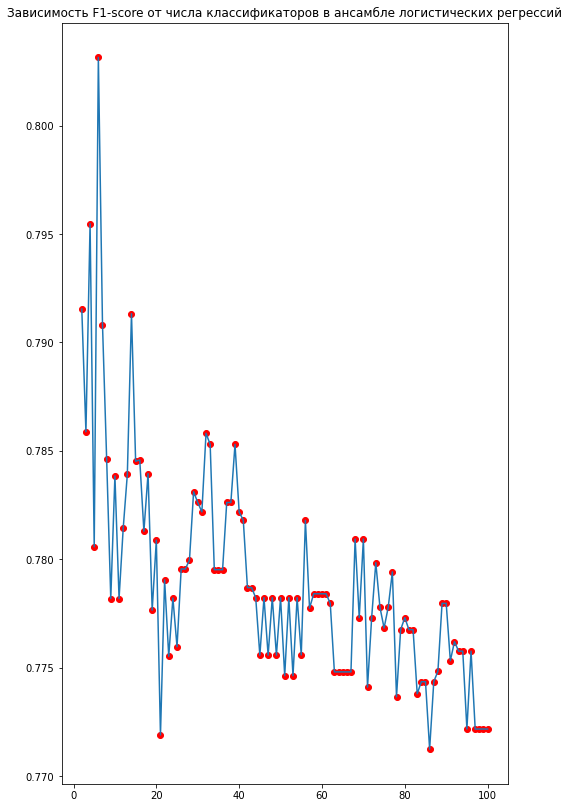

In [66]:
plt.figure(figsize=(8, 14))
plt.title("Зависимость F1-score от числа классификаторов в ансамбле логистических регрессий")

plt.plot(np.arange(N_min, N_max + 1), scores)
plt.scatter(np.arange(N_min, N_max + 1), scores, color='red')

plt.show()

### Accuracy score

In [67]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
    ('clf', LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500))
])

parameters = {
    "clf__C": np.logspace(-10, 5, 85)
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", verbose=3)

# Training

clf.fit(X_train, y_train)

# Get optimal parameters
params = {
    "multi_class": "multinomial", 
    "solver": "saga",     
    "tol": 1e-3, 
    "max_iter": 500,
    'C': clf.best_params_['clf__C']
}

Fitting 5 folds for each of 85 candidates, totalling 425 fits
[CV 1/5] END ......................clf__C=1e-10;, score=0.255 total time=   0.0s
[CV 2/5] END ......................clf__C=1e-10;, score=0.264 total time=   0.0s
[CV 3/5] END ......................clf__C=1e-10;, score=0.264 total time=   0.0s
[CV 4/5] END ......................clf__C=1e-10;, score=0.264 total time=   0.0s
[CV 5/5] END ......................clf__C=1e-10;, score=0.257 total time=   0.0s
[CV 1/5] END .....clf__C=1.5085907086001793e-10;, score=0.255 total time=   0.0s
[CV 2/5] END .....clf__C=1.5085907086001793e-10;, score=0.264 total time=   0.0s
[CV 3/5] END .....clf__C=1.5085907086001793e-10;, score=0.264 total time=   0.0s
[CV 4/5] END .....clf__C=1.5085907086001793e-10;, score=0.264 total time=   0.0s
[CV 5/5] END .....clf__C=1.5085907086001793e-10;, score=0.257 total time=   0.0s
[CV 1/5] END ......clf__C=2.275845926074791e-10;, score=0.255 total time=   0.0s
[CV 2/5] END ......clf__C=2.275845926074791e-10

In [68]:
pipe_X = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
])

X_train_transformed = pipe_X.fit_transform(X_train)
X_test_transformed = pipe_X.transform(X_test)

# Best result
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
log_reg_factory = EnsembleFactory(LogisticRegression, params, N_min, N_max, X_train_scaled, y_train)

In [70]:
scores = []

for N in range(N_min, N_max + 1):
    log_reg_ensemble = log_reg_factory.get_ensemble(N)
    score = accuracy_score(y_test, log_reg_ensemble.predict(X_test_scaled))    

    scores.append(score)

print(f"Max score: {np.array(scores).max()}")

Max score: 0.797979797979798


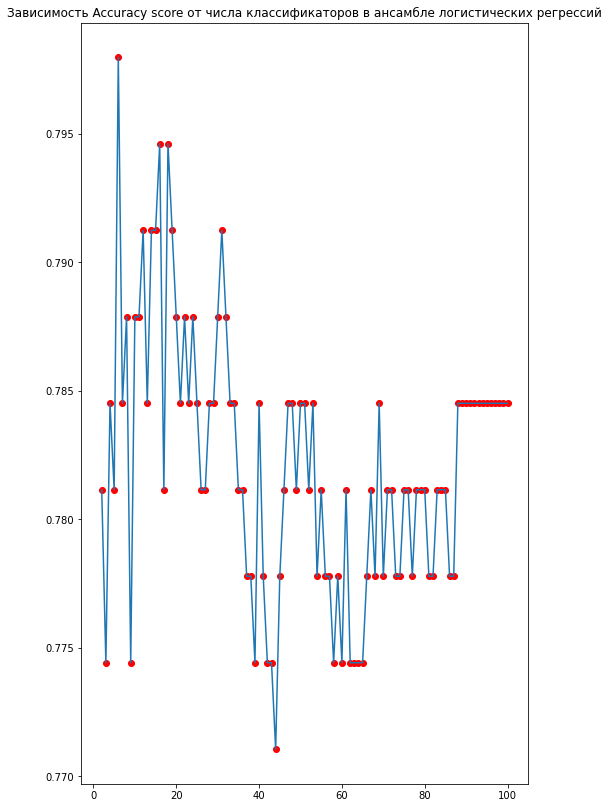

In [71]:
plt.figure(figsize=(8, 14))
plt.title("Зависимость Accuracy score от числа классификаторов в ансамбле логистических регрессий")

plt.plot(np.arange(N_min, N_max + 1), scores)
plt.scatter(np.arange(N_min, N_max + 1), scores, color='red')

plt.show()

Bagging над логистическими регрессиями совсем незначительно увеличил оценки. Сумма линейных моделей - линейна, поэтому в итоге это просто одна модель.

### Decision Tree

### F1-score

In [72]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([    
    ('clf', DecisionTreeClassifier())
])

parameters = {
    "clf__max_depth": np.arange(1, 2000)
}

clf = GridSearchCV(pipe, parameters, scoring="f1_macro", verbose=3)

# Training

clf.fit(X_train, y_train)

# Get optimal parameters
params = {    
    'max_depth': clf.best_params_['clf__max_depth']
}

Fitting 5 folds for each of 1999 candidates, totalling 9995 fits
[CV 1/5] END ..................clf__max_depth=1;, score=0.290 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=1;, score=0.313 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=1;, score=0.288 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=1;, score=0.281 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=1;, score=0.247 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=2;, score=0.520 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=2;, score=0.480 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=2;, score=0.469 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=2;, score=0.467 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=2;, score=0.458 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=3;, score=0.514 total time=   0.0s
[CV 2/5] END ..................clf__max_dept

In [73]:
pipe_X = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
])

X_train_transformed = pipe_X.fit_transform(X_train)
X_test_transformed = pipe_X.transform(X_test)

# Best result
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
decision_tree_factory = EnsembleFactory(DecisionTreeClassifier, params, N_min, N_max, X_train, y_train)

In [75]:
scores = []

for N in range(N_min, N_max + 1):
    decision_tree = decision_tree_factory.get_ensemble(N)
    score = f1_score(y_test, decision_tree.predict(X_test), average='macro')    

    scores.append(score)

print(f"Max score: {np.array(scores).max()}")

Max score: 0.7505164971990381


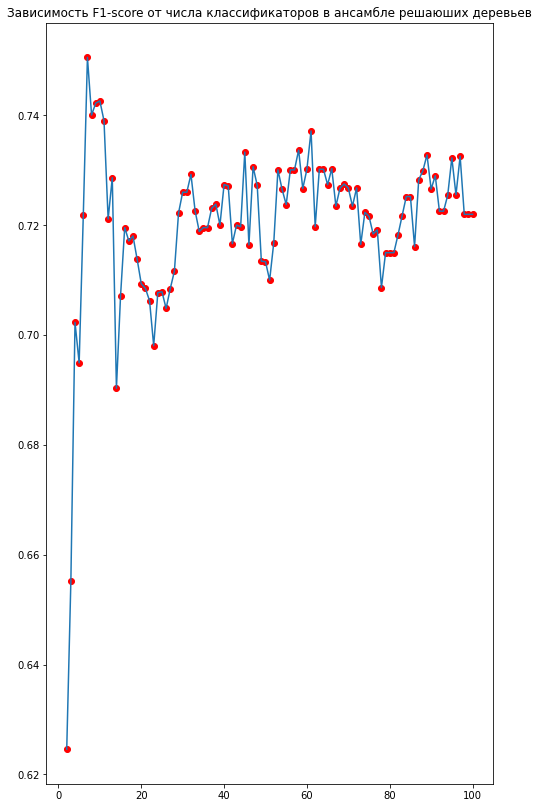

In [76]:
plt.figure(figsize=(8, 14))
plt.title("Зависимость F1-score от числа классификаторов в ансамбле решаюших деревьев")

plt.plot(np.arange(N_min, N_max + 1), scores)
plt.scatter(np.arange(N_min, N_max + 1), scores, color='red')

plt.show()

### Accuracy score

In [77]:
# Pipeline + Optimal Hyperparameters

pipe = Pipeline([    
    ('clf', DecisionTreeClassifier())
])

parameters = {
    "clf__max_depth": np.arange(1, 2000)
}

clf = GridSearchCV(pipe, parameters, scoring="accuracy", verbose=3)

# Training

clf.fit(X_train, y_train)

# Get optimal parameters
params = {    
    'max_depth': clf.best_params_['clf__max_depth']
}

Fitting 5 folds for each of 1999 candidates, totalling 9995 fits
[CV 1/5] END ..................clf__max_depth=1;, score=0.436 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=1;, score=0.473 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=1;, score=0.436 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=1;, score=0.418 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=1;, score=0.376 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=2;, score=0.600 total time=   0.0s
[CV 2/5] END ..................clf__max_depth=2;, score=0.564 total time=   0.0s
[CV 3/5] END ..................clf__max_depth=2;, score=0.545 total time=   0.0s
[CV 4/5] END ..................clf__max_depth=2;, score=0.536 total time=   0.0s
[CV 5/5] END ..................clf__max_depth=2;, score=0.532 total time=   0.0s
[CV 1/5] END ..................clf__max_depth=3;, score=0.591 total time=   0.0s
[CV 2/5] END ..................clf__max_dept

In [78]:
pipe_X = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('scaler2', MinMaxScaler()),
])

X_train_transformed = pipe_X.fit_transform(X_train)
X_test_transformed = pipe_X.transform(X_test)

# Best result
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
decision_tree_factory = EnsembleFactory(DecisionTreeClassifier, params, N_min, N_max, X_train, y_train)

In [80]:
scores = []

for N in range(N_min, N_max + 1):
    decision_tree = decision_tree_factory.get_ensemble(N)
    score = accuracy_score(y_test, decision_tree.predict(X_test))    

    scores.append(score)

print(f"Max score: {np.array(scores).max()}")

Max score: 0.7474747474747475


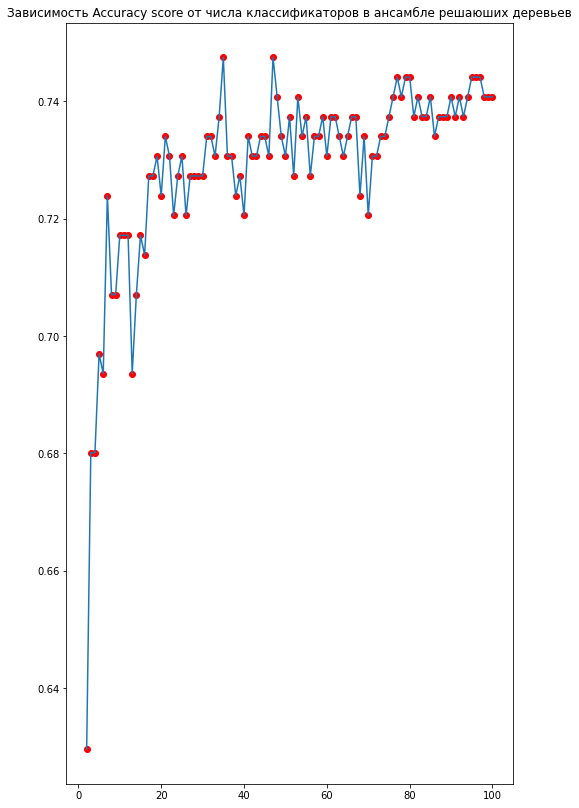

In [81]:
plt.figure(figsize=(8, 14))
plt.title("Зависимость Accuracy score от числа классификаторов в ансамбле решаюших деревьев")

plt.plot(np.arange(N_min, N_max + 1), scores)
plt.scatter(np.arange(N_min, N_max + 1), scores, color='red')

plt.show()

Бэггинг над деревьями смог улучшить оценки, в среднем при увеличении числа деревьев увеличивалось качество. Деревья в ансамбле должны быть достаточно глубокими, в нашем случае оптимальная глубина - 387, этого более чем достаточно.

In [82]:
params

{'max_depth': 1014}

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
f1_train = []
f1_test = []

accuracy_train = []
accuracy_test = []

for N in range(N_min, N_max + 1):
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components)),
        ('clf', RandomForestClassifier(N))
    ])

    clf.fit(X_train, y_train)

    f1_train.append(f1_score(y_train, clf.predict(X_train), average='macro'))
    f1_test.append(f1_score(y_test, clf.predict(X_test), average='macro'))

    accuracy_train.append(accuracy_score(y_train, clf.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, clf.predict(X_test)))

### F1-score

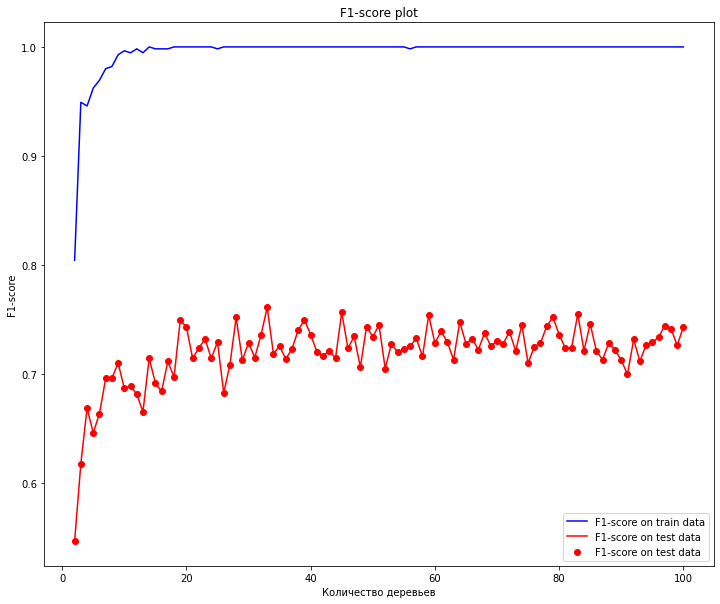

In [90]:
plt.figure(figsize=(12, 10))
plt.title('F1-score plot')

plt.plot(np.arange(N_min, N_max+1), f1_train, label='F1-score on train data', color='blue')
plt.plot(np.arange(N_min, N_max+1), f1_test, label='F1-score on test data', color='red')
plt.scatter(np.arange(N_min, N_max+1), f1_test, label='F1-score on test data', color='red')

plt.xlabel('Количество деревьев')
plt.ylabel('F1-score')

plt.legend()

plt.show()

In [92]:
best_trees = np.argmax(f1_test) + N_min
best_trees

33

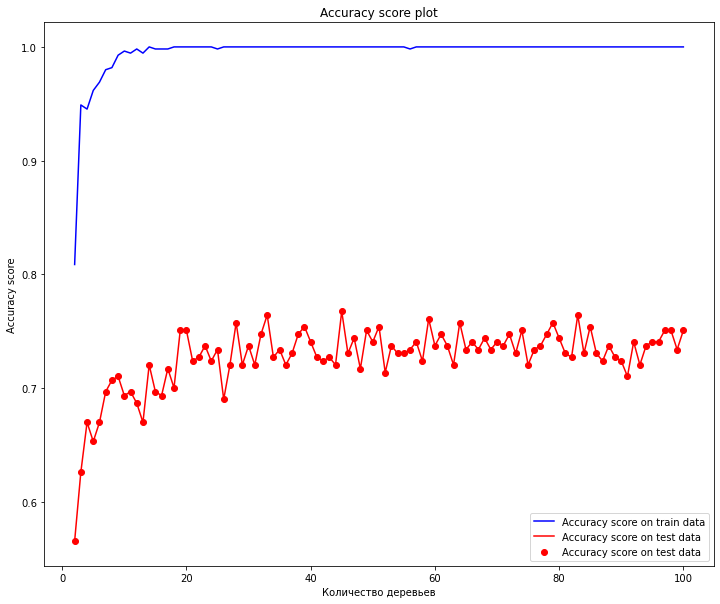

In [95]:
plt.figure(figsize=(12, 10))
plt.title('Accuracy score plot')

plt.plot(np.arange(N_min, N_max+1), accuracy_train, label='Accuracy score on train data', color='blue')
plt.plot(np.arange(N_min, N_max+1), accuracy_test, label='Accuracy score on test data', color='red')
plt.scatter(np.arange(N_min, N_max+1), accuracy_test, label='Accuracy score on test data', color='red')

plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy score')

plt.legend()

plt.show()

In [94]:
best_trees = np.argmax(accuracy_test) + N_min
best_trees

45

Лучшее количество деревьев для f1 - 33, для accuracy - 45. Случайный лес превзошел логистическую регрессию (с PCA) и бэггинг, для лучшего результата взялось достаточно большое количество деревьев. Начиная где-то с 40 деревьев результаты начинают колебаться, что свидетельствует о достижении метриками наилучших значений.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [23]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [30]:
f1_scores = []
accuracy_scores = []

def train_parts():
    parts = np.array_split(X_train_scaled, 10)
    train_subset = np.array([])

    for i in range(10):
        if len(train_subset) == 0:
            train_subset = parts[0]
        else:
            train_subset = np.vstack((train_subset, parts[i]))

        clf = RandomForestClassifier(33)
        clf.fit(train_subset, y_train[:len(train_subset)])

        f1_scores.append(f1_score(y_test, clf.predict(X_test_scaled), average="macro"))
        accuracy_scores.append(accuracy_score(y_test, clf.predict(X_test_scaled)))

train_parts()

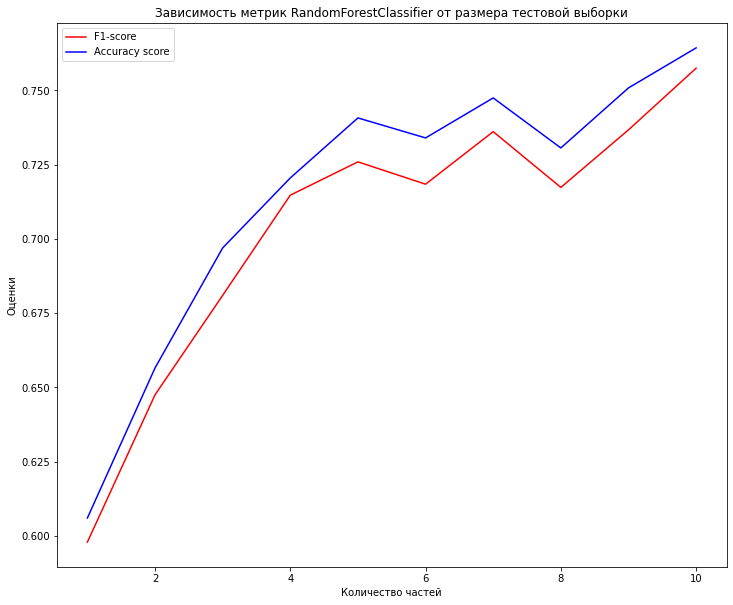

In [31]:
plt.figure(figsize=(12, 10))
plt.title("Зависимость метрик RandomForestClassifier от размера тестовой выборки")

plt.plot(np.arange(1, 11), f1_scores, label="F1-score", color='red')
plt.plot(np.arange(1, 11), accuracy_scores, label="Accuracy score", color='blue')
plt.xlabel("Количество частей")
plt.ylabel("Оценки")

plt.legend()

plt.show()

В принципе с увеличением размера выборки увеличивается и точность, хотя иногда бывает ситуация, когда показатели падают, а затем резко поднимаются.